In [1]:
##Machine Learning lib

import pandas as pd
import numpy as np
import pickle 
import nltk
import re
from nltk.stem import PorterStemmer
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.preprocessing import LabelEncoder
plt.style.use('ggplot')

In [2]:
##Deep Learning lib

from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout
from keras.callbacks import EarlyStopping
from keras.preprocessing.text import one_hot
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

In [3]:
 %pwd

'C:\\Users\\Tejaswi\\Downloads'

In [4]:
import os
os.chdir('D:\Code\Emotions_dataset_for_NLP')

In [5]:
%pwd

'D:\\Code\\Emotions_dataset_for_NLP'

In [6]:
train_data = pd.read_csv('train.txt',header = None, sep=";",names=["Comment","Emotion"],encoding="utf-8")

In [7]:
train_data['length'] = [len(x) for x in train_data['Comment']]

In [8]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,sadness,23
1,i can go from feeling so hopeless to so damned...,sadness,108
2,im grabbing a minute to post i feel greedy wrong,anger,48
3,i am ever feeling nostalgic about the fireplac...,love,92
4,i am feeling grouchy,anger,20


In [9]:
train_data.shape

(16000, 3)

In [10]:
train_data.isnull().sum()

Comment    0
Emotion    0
length     0
dtype: int64

In [11]:
train_data.duplicated().sum()

1

In [12]:
tc=train_data.columns.tolist()
tc

['Comment', 'Emotion', 'length']

In [13]:
##EDA

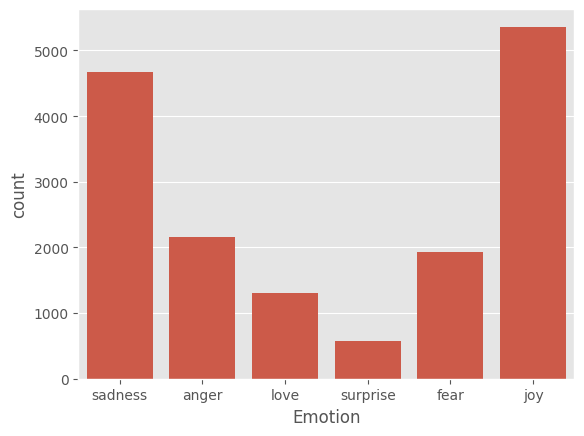

In [14]:
sns.countplot(x=train_data['Emotion'])
plt.show()

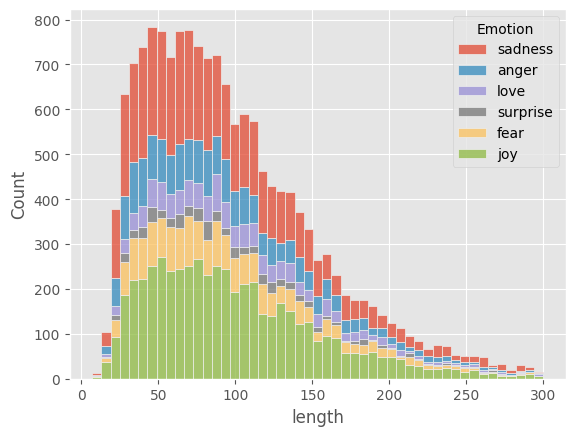

In [15]:
df2= train_data.copy()
df2['length'] = [len(x) for x in train_data['Comment']]
length_value = df2['length'].values
sns.histplot(data=df2, x=df2['length'], hue = 'Emotion', multiple = 'stack')
plt.show()

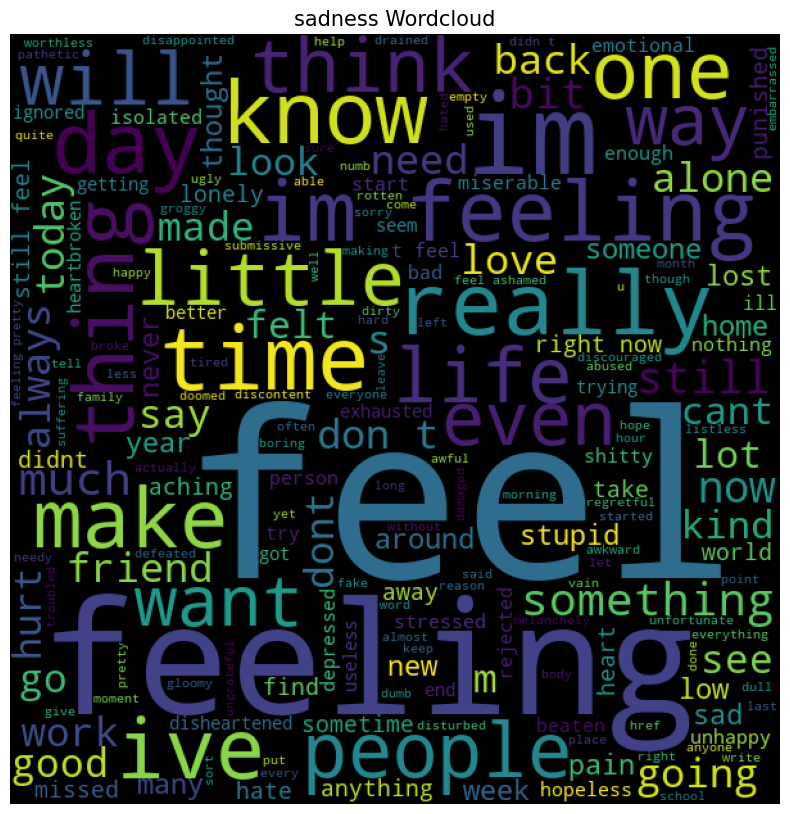

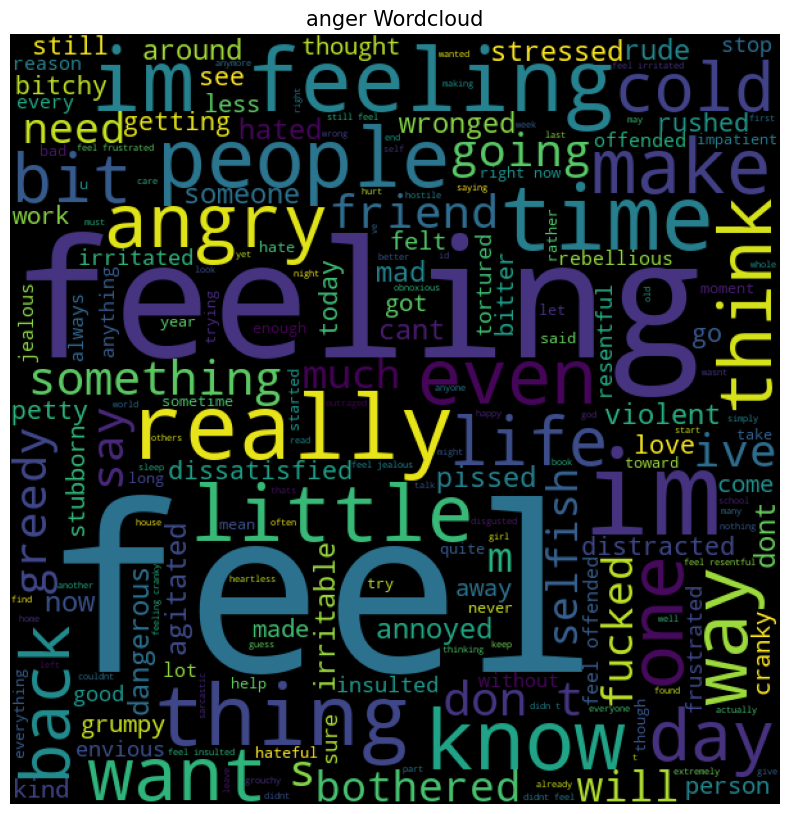

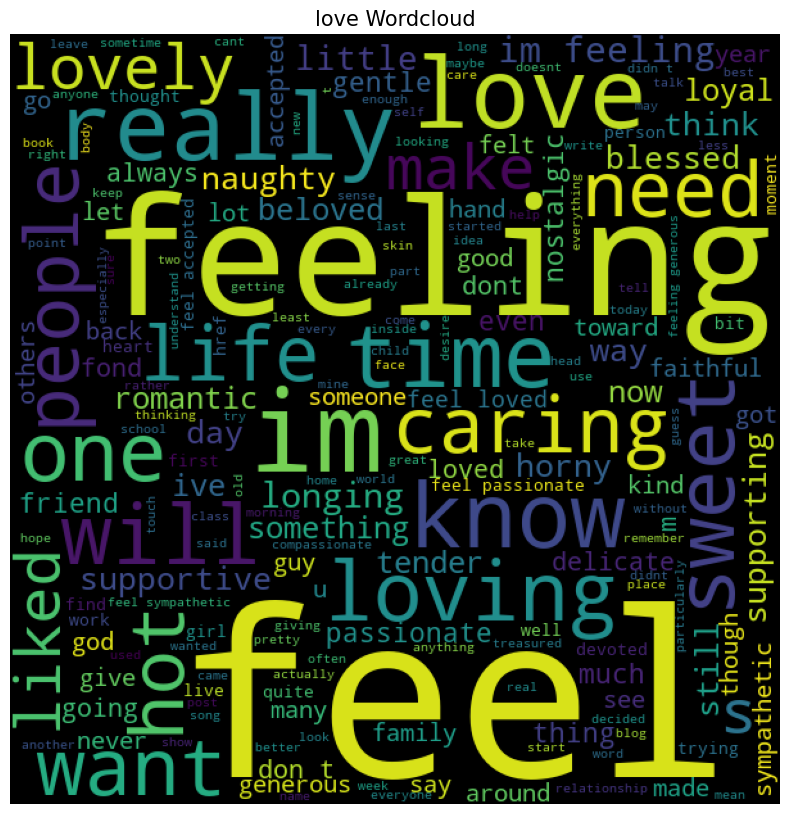

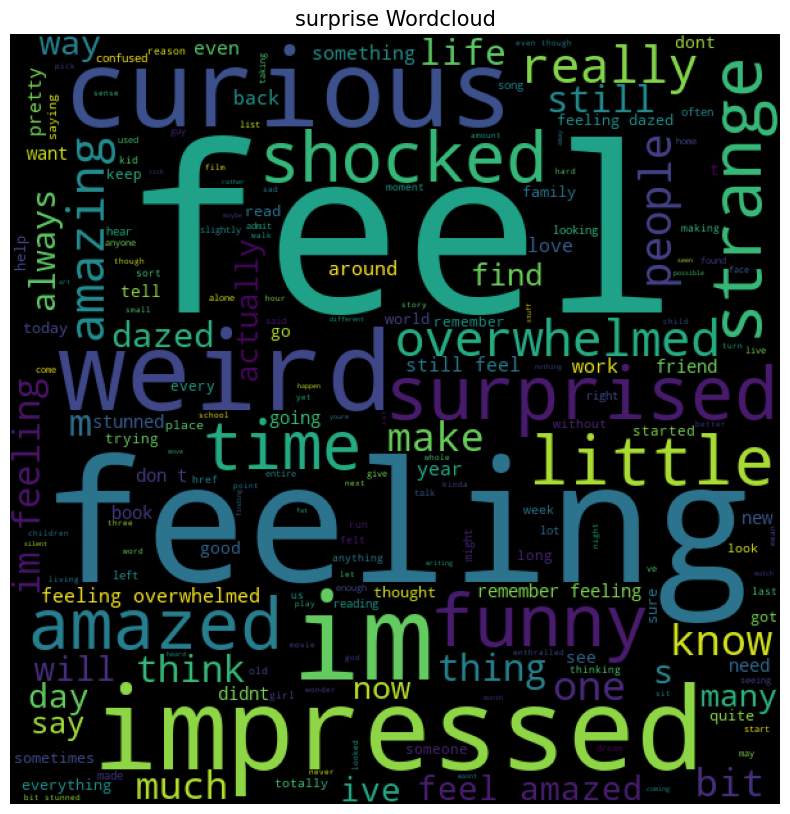

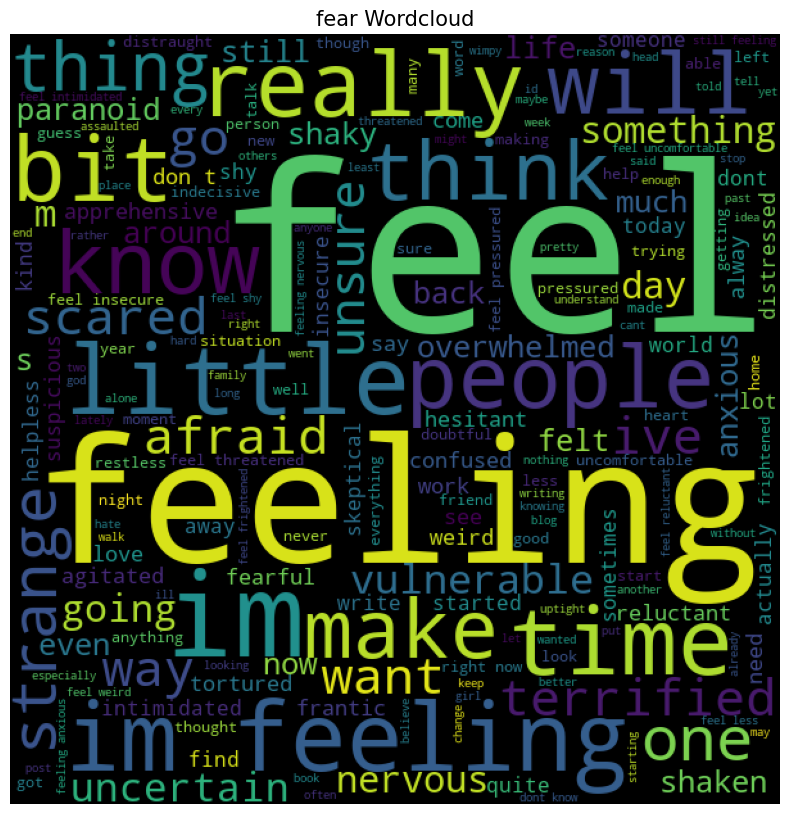

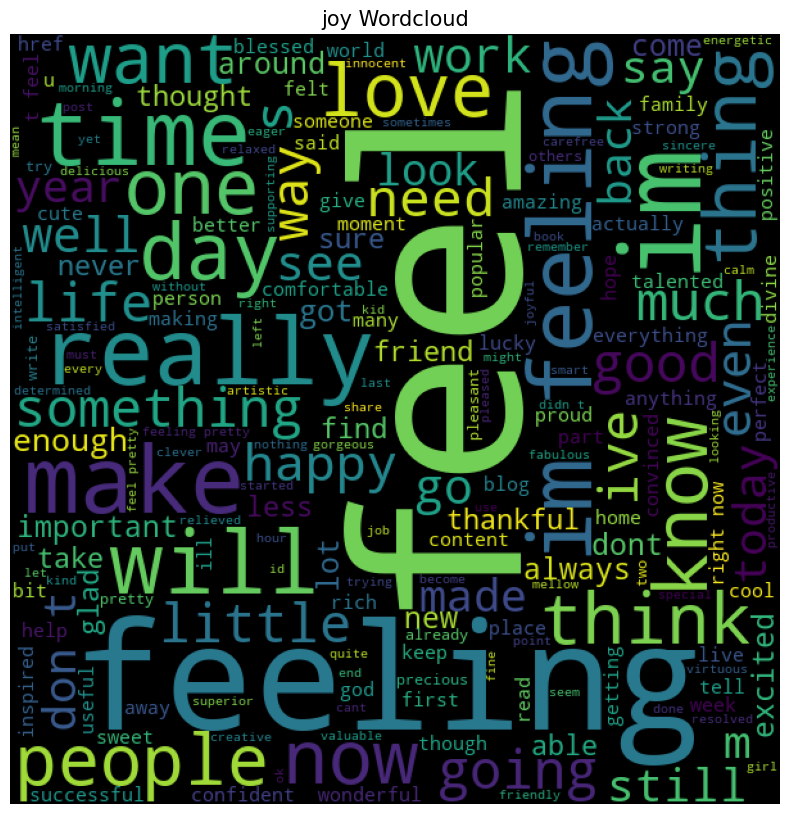

In [16]:
def words_cloud(wordcloud, df):
    plt.figure(figsize=(10,10))
    plt.title(df + ' Wordcloud', size=15)
    plt.imshow(wordcloud)
    plt.axis("off")

emotions_list = train_data['Emotion'].unique()
for emotion in emotions_list:
    text=' '.join([sentence for sentence in train_data.loc[train_data['Emotion']==emotion,'Comment']])
    wordcloud = WordCloud(width = 600, height = 600).generate(text)
    words_cloud(wordcloud, emotion)


In [17]:
##Data Preprocessing
lb = LabelEncoder()
train_data['Emotion'] = lb.fit_transform(train_data['Emotion'])

In [18]:
train_data.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [19]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

In [20]:
df = train_data.copy()
df.head()

,Comment,Emotion,length
0,i didnt feel humiliated,4,23
1,i can go from feeling so hopeless to so damned...,4,108
2,im grabbing a minute to post i feel greedy wrong,0,48
3,i am ever feeling nostalgic about the fireplac...,3,92
4,i am feeling grouchy,0,20


In [21]:
from tqdm import tqdm
tqdm.pandas()
nltk.download('stopwords')
stopwords = set(nltk.corpus.stopwords.words('english'))

def clean_data(text):
    stemmer = PorterStemmer()
    text = re.sub("[^a-zA-Z]"," ",text)
    text = text.lower()
    text = text.split()
    text = [stemmer.stem(word) for word in text if word not in stopwords]
    return " ".join(text)
    
df['cleaned_comment']=df['Comment'].progress_apply(clean_data)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tejaswi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
100%|██████████████████████████████████████████████████████████████████████████| 16000/16000 [00:02<00:00, 7795.46it/s]


In [22]:
df.head()

,Comment,Emotion,length,cleaned_comment
0,i didnt feel humiliated,4,23,didnt feel humili
1,i can go from feeling so hopeless to so damned...,4,108,go feel hopeless damn hope around someon care ...
2,im grabbing a minute to post i feel greedy wrong,0,48,im grab minut post feel greedi wrong
3,i am ever feeling nostalgic about the fireplac...,3,92,ever feel nostalg fireplac know still properti
4,i am feeling grouchy,0,20,feel grouchi


In [23]:
X_train,X_test,y_train,y_test = train_test_split(df['cleaned_comment'],df['Emotion'], test_size=0.2, random_state=42)

In [24]:
tfidfvectorizer = TfidfVectorizer()
X_train_tfidf = tfidfvectorizer.fit_transform(X_train)
X_test_tfidf = tfidfvectorizer.transform(X_test)

In [25]:
X_train_tfidf.shape

(12800, 9257)

In [26]:
classifier={
    'MultinomialNB' : MultinomialNB(),
    'LogisticRegression' : LogisticRegression(max_iter=1000),
    'Random Forest' : RandomForestClassifier(),
    'Support Vector Machine' : SVC(),
}    

for name,clf in classifier.items():
    print(f"\n**********{name}***********")
    clf.fit(X_train_tfidf, y_train)
    y_pred_tfidf = clf.predict(X_test_tfidf)
    accuracy_tfidf = accuracy_score(y_test, y_pred_tfidf)
    print(f"***********{accuracy_tfidf}*********")
    print("Classification Report")
    print(classification_report(y_test, y_pred_tfidf))
    


**********MultinomialNB***********
***********0.655*********
Classification Report
              precision    recall  f1-score   support

           0       0.93      0.31      0.46       427
           1       0.91      0.24      0.38       397
           2       0.58      0.98      0.73      1021
           3       1.00      0.03      0.06       296
           4       0.70      0.91      0.79       946
           5       1.00      0.01      0.02       113

    accuracy                           0.66      3200
   macro avg       0.85      0.41      0.41      3200
weighted avg       0.76      0.66      0.58      3200


**********LogisticRegression***********
***********0.8296875*********
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.79      0.83       427
           1       0.84      0.73      0.78       397
           2       0.78      0.94      0.85      1021
           3       0.80      0.49      0.61       296
         

In [27]:
lg = LogisticRegression()
lg.fit(X_train_tfidf, y_train)
lg_y_pred = lg.predict(X_test_tfidf)

C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [28]:
rf = RandomForestClassifier()
rf.fit(X_train_tfidf, y_train)
rf_y_pred = rf.predict(X_test_tfidf)

In [29]:
def predict_emotion(input_text):
    cleaned_text = clean_data(input_text)
    input_vectorizer = tfidfvectorizer.transform([cleaned_text])
    predicted_label = lg.predict(input_vectorizer)[0]
    predicted_emotion = lb.inverse_transform([predicted_label])[0]
    label = np.max(lg.predict(input_vectorizer))
    return predicted_emotion, label
    

In [30]:
predict_emotion("I promise u")

('sadness', 4)

In [31]:
import pickle
pickle.dump(lg,open("logistic_regression.pkl","wb"))
pickle.dump(lb,open("label_encoder.pkl","wb"))
pickle.dump(tfidfvectorizer,open("tfidfvectorizer.pkl","wb"))


In [32]:
%pwd

'D:\\Code\\Emotions_dataset_for_NLP'

In [33]:
##Applying Deep Learning using LSTM(Long Short Term Memory)

In [34]:


def text_cleaning(df, column, vocab_size, max_len):
    stemmer = PorterStemmer()
    corpus =[]
    for text in df[column]:
        text =re.sub("[^a-zA-z]", " ",text)
        text = text.lower()
        text = text.split()
        text =[stemmer.stem(word) for word in text if word not in stopwords]
        text = " ".join(text)
        corpus.append(text)
    one_hot_word = [one_hot(input_text=word,n=vocab_size) for word in corpus ]
    pad = pad_sequences(sequences=one_hot_word, maxlen=max_len , padding="pre")
    return pad

In [35]:
x_train = text_cleaning(train_data,"Comment",vocab_size=11000, max_len=300)
y_train =to_categorical(train_data["Emotion"])

In [36]:
x_train = text_cleaning(train_data, "Comment", vocab_size=11000, max_len=300)
y_train = to_categorical(train_data["Emotion"])

In [37]:
from keras.callbacks import EarlyStopping

model = Sequential()
model.add(Embedding(input_dim = 12000, output_dim =150, input_length=300))
model.add(Dropout(0.2))
model.add(LSTM(128))
model.add(Dropout(0.2))
model.add(Dense(64, activation ='sigmoid'))
model.add(Dropout(0.2))
model.add(Dense(6, activation ='softmax'))    
model.compile(optimizer='adam', loss = "categorical_crossentropy", metrics=['accuracy'])

callback = EarlyStopping(monitor="val_loss", patience=2, restore_best_weights=True)
model.fit(x_train,y_train, epochs = 1, batch_size =64, verbose =1, callbacks=[callback])       





250/250 [==============================] - 66s 255ms/step - loss: 1.5880 - accuracy: 0.3458


In [38]:
model.save("model.h5")

C:\Users\Tejaswi\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [39]:
from keras.models import load_model
model01 = load_model("model.h5")

In [40]:
def predictive_system_dl(sentence):
    stemmer = PorterStemmer()
    corpus = []
    text =re.sub("[^a-zA-z]", " ",sentence)
    text = text.lower()
    text = text.split()
    text =[stemmer.stem(word) for word in text if word not in stopwords]
    text = " ".join(text)
    corpus.append(text)
    one_hot_word = [one_hot(input_text=word,n=11000) for word in corpus ]
    pad = pad_sequences(sequences=one_hot_word, maxlen=300 , padding="pre")
    return pad
    

In [52]:
sentence = predictive_system_dl("I hate u")
result = lb.inverse_transform(np.argmax(model.predict(sentence),axis=1))[0]
prob = np.max(model01.predict(sentence))
print(f"{result} with probability of {prob}")

1/1 [==============================] - 0s 22ms/step
sadness with probability of 0.6850272417068481


In [54]:
with open("lb1.pkl","wb") as f:
    pickle.dump(lb,f)
vocab_info = {"vocab_Size": 11000, 'max_len':300}
with open("vocab_info.pkl","wb") as f:
    pickle.dump(vocab_info,f)